## Mohammed AL-Sayed Agoor   --- G7

---

## Practical Work 1

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [2]:
data_single = np.genfromtxt('RegData.csv', delimiter=',')

#### Explore your data

In [3]:
data_single

array([[2.9000001 , 4.        ],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [4]:
X = data_single[:,0].reshape(-1,1)
y = data_single[:,1].reshape(-1,1)

#### Explore your data

In [5]:
X

array([[2.9000001 ],
       [6.69999981],
       [4.9000001 ],
       [7.9000001 ],
       [9.80000019],
       [6.9000001 ],
       [6.0999999 ],
       [6.19999981],
       [6.        ],
       [5.0999999 ],
       [4.69999981],
       [4.4000001 ],
       [5.80000019]])

In [6]:
y

array([[4.        ],
       [7.4000001 ],
       [5.        ],
       [7.19999981],
       [7.9000001 ],
       [6.0999999 ],
       [6.        ],
       [5.80000019],
       [5.19999981],
       [4.19999981],
       [4.        ],
       [4.4000001 ],
       [5.19999981]])

#### Plot the original data (scatter plot of X,y)

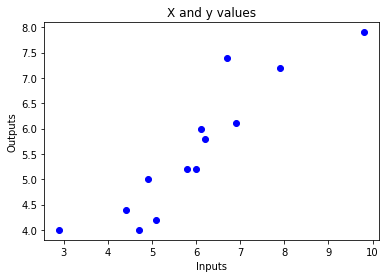

In [7]:
plt.scatter(X, y, c='b')
plt.xlabel('Inputs')
plt.ylabel('Outputs')
plt.title('X and y values');

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate. 

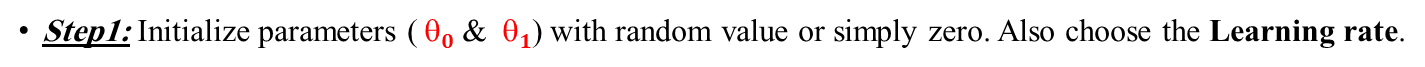

In [8]:
thetas_single = np.zeros(2)

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.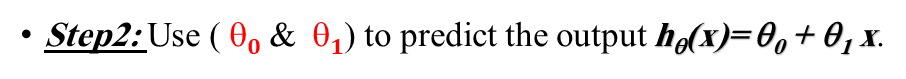
#### Note: you will need to iterate through all data points

In [9]:
def predict_single(X, y, theta_input):
    
    h_theta = theta_input[0] + theta_input[1] * X
    
    return h_theta

predict_single(X, y, thetas_single)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

### Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).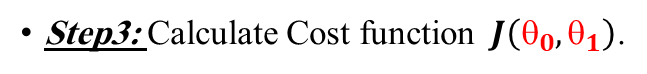
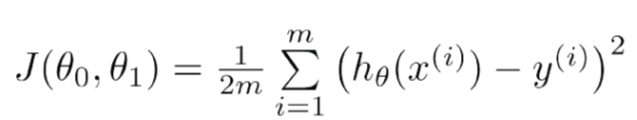

In [10]:
def cost_single(X, y, theta_input):
    
    h_theta = predict_single(X, y, theta_input)
    
    h_y = (h_theta - y)**2
    j = np.sum(h_y) / (2* len(X))
    
    return j

cost_single(X, y, thetas_single)   

16.305384479692318

### Step4: Calculate the gradient.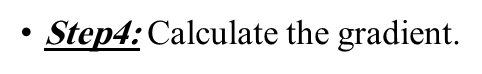
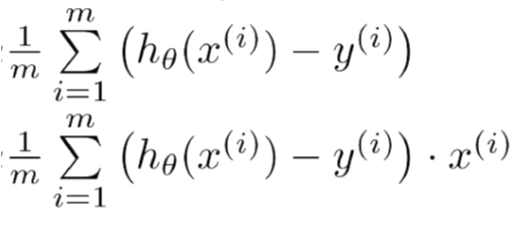

In [11]:
def gradient_single(X, y, theta_input):
    
    h_theta = predict_single(X, y, theta_input)
    
    h_y_0 = h_theta - y 
    h_y_1 = (h_theta - y) * X
    
    grad_0 = np.sum(h_y_0) / len(X)
    grad_1 = np.sum(h_y_1) / len(X)
    
    grad = np.array([grad_0, grad_1])
    
    return grad

gradient_single(X, y, thetas_single)

array([ -5.56923074, -35.04384604])

### Step5: Update the parameters (simultaneously).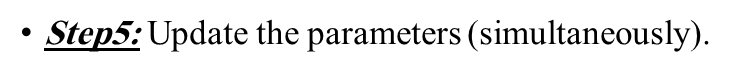
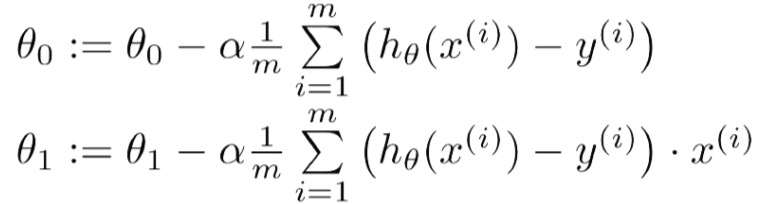

In [12]:
def update_thetas(X, y, theta_input, alfa):
    
    grads = gradient_single(X, y, theta_input)
    
    for i in range(theta_input.shape[0]):
        theta_input[i] = theta_input[i] - alfa * grads[i]
    
    return theta_input

update_thetas(X, y, thetas_single, 0.001)        

array([0.00556923, 0.03504385])

### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.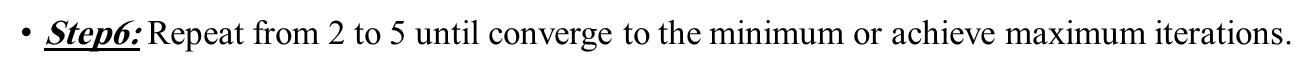

In [13]:
def repeat_single(X, y, theta_input, alfa, iters):
    
    thetas_new = update_thetas(X, y, theta_input, alfa)
    
    for i in range(iters):
        thetas_new = update_thetas(X, y, theta_input, alfa)
        
    return thetas_new

final_thetas = repeat_single(X, y, thetas_single, 0.01, 1000)
final_thetas

array([0.78861649, 0.79541675])

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [14]:
final_vals = final_thetas[0] + final_thetas[1] * X
final_vals

array([[3.09532514],
       [6.11790856],
       [4.68615864],
       [7.07240889],
       [8.58370079],
       [6.27699214],
       [5.64065859],
       [5.72020019],
       [5.56111699],
       [4.84524184],
       [4.52707506],
       [4.28845027],
       [5.40203379]])

#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

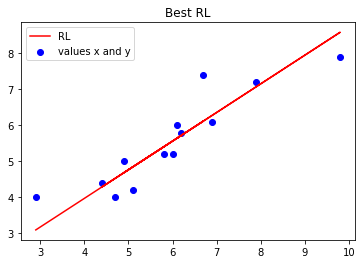

In [15]:
plt.scatter(X, y, c='b', label='values x and y')
plt.plot(X, final_vals, c='r' , label='RL')
plt.title('Best RL')
plt.legend();

#### Use R2 score to evaluate LR equation output
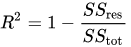
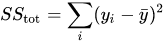
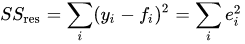
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [16]:
from sklearn.metrics import r2_score
score_sk = r2_score(y, final_vals)
print('Score : ', score_sk)

Score :  0.8027252515124036


## GD vectorize Implementation
### Implement GD without iterate through data points i.e. use vector operations

In [17]:
theta_norm = np.zeros(2)

In [18]:
def cost_norm(X, y, theta):
    
    h_theta = predict_single(X, y, theta)
    
    h_y = h_theta - y
    j_sqrt = np.linalg.norm(h_y, 2)     # using vector norm
    j = (j_sqrt**2)/(2*len(data_single))
    
    
    j = np.array(j)
    return j

cost_norm(X, y, theta_norm)  #### the same above results

array(16.30538448)

## Get ALL in One Fnuction

In [19]:
X = np.insert(arr=X, obj=0, values=1, axis=1)
X

array([[1.        , 2.9000001 ],
       [1.        , 6.69999981],
       [1.        , 4.9000001 ],
       [1.        , 7.9000001 ],
       [1.        , 9.80000019],
       [1.        , 6.9000001 ],
       [1.        , 6.0999999 ],
       [1.        , 6.19999981],
       [1.        , 6.        ],
       [1.        , 5.0999999 ],
       [1.        , 4.69999981],
       [1.        , 4.4000001 ],
       [1.        , 5.80000019]])

In [20]:
y = y.reshape(-1)
y

array([4.        , 7.4000001 , 5.        , 7.19999981, 7.9000001 ,
       6.0999999 , 6.        , 5.80000019, 5.19999981, 4.19999981,
       4.        , 4.4000001 , 5.19999981])

In [21]:
thetas_new = np.zeros(2)

In [22]:
def gradient_descent_single(X, y, theta_first, alfa, iters):
     
    cost_steps = np.zeros(iters)
    
    theta_steps = np.zeros(iters*2).reshape(-1,2)
            
    for i in range(iters):
        
        h_theta = X @ theta_first
        
        loss = h_theta - y
        
        cost = np.sum(loss**2) / (2 * len(X))
        
        gradient = (X.T @ loss) / len(X)
        
        theta_first = theta_first - alfa * gradient
        
        
        
        # append in arrays
        theta_other = theta_first
        cost_steps[i] = cost
        theta_steps[i] = theta_other
        
        
    return theta_first, theta_steps, cost_steps

In [23]:
theta_final, theta_steps, cost_steps = gradient_descent_single(X, y, thetas_new, 0.01, 1000)

print(theta_final)

[0.78812307 0.79549387]


In [24]:
final_single = theta_final[0] + theta_final[1] * X[:,1]
final_single

array([3.09505537, 6.11793184, 4.6860431 , 7.07252471, 8.58396314,
       6.27703084, 5.6406356 , 5.72018491, 5.56108628, 4.84514173,
       4.5269441 , 4.28829617, 5.40198766])

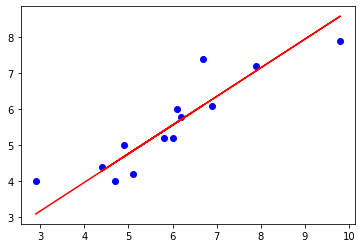

In [25]:
plt.scatter(X[:,1], y, c='b')
plt.plot(X[:,1], final_single, c='r');

## Plot loss function
### Repeat your last vectorized implementaion version and save loss for each iteration (epoch)

In [26]:
print(cost_steps)

[16.30538448  6.17560881  2.41783007  1.0237981   0.50661828  0.31471433
  0.24347431  0.21699567  0.20712173  0.20340751  0.20197837  0.20139696
  0.2011301   0.20098     0.20087328  0.20078272  0.20069823  0.20061606
  0.20053482  0.200454    0.2003734   0.20029295  0.20021264  0.20013244
  0.20005235  0.19997238  0.19989252  0.19981276  0.19973312  0.19965359
  0.19957417  0.19949486  0.19941566  0.19933657  0.19925759  0.19917872
  0.19909996  0.19902131  0.19894277  0.19886434  0.19878601  0.1987078
  0.19862969  0.19855169  0.1984738   0.19839602  0.19831835  0.19824078
  0.19816332  0.19808597  0.19800873  0.19793159  0.19785456  0.19777764
  0.19770083  0.19762412  0.19754752  0.19747102  0.19739463  0.19731835
  0.19724217  0.1971661   0.19709013  0.19701427  0.19693851  0.19686286
  0.19678732  0.19671188  0.19663654  0.19656131  0.19648619  0.19641116
  0.19633625  0.19626143  0.19618672  0.19611211  0.19603761  0.19596321
  0.19588892  0.19581472  0.19574063  0.19566665  0.

### Plot loss vs. iterations

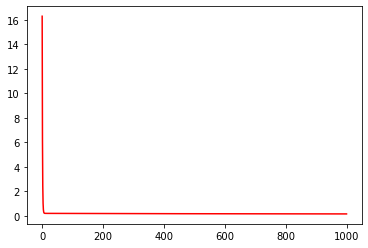

In [27]:
iters = np.arange(1000)
plt.plot(iters, cost_steps, c='r');

## Multivariate LR

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [28]:
data_double = np.genfromtxt('MultipleLR.csv', delimiter=',')
data_double

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [29]:
data_double = np.insert(arr=data_double, values=1, obj=0, axis=1)
data_double

array([[  1.,  73.,  80.,  75., 152.],
       [  1.,  93.,  88.,  93., 185.],
       [  1.,  89.,  91.,  90., 180.],
       [  1.,  96.,  98., 100., 196.],
       [  1.,  73.,  66.,  70., 142.],
       [  1.,  53.,  46.,  55., 101.],
       [  1.,  69.,  74.,  77., 149.],
       [  1.,  47.,  56.,  60., 115.],
       [  1.,  87.,  79.,  90., 175.],
       [  1.,  79.,  70.,  88., 164.],
       [  1.,  69.,  70.,  73., 141.],
       [  1.,  70.,  65.,  74., 141.],
       [  1.,  93.,  95.,  91., 184.],
       [  1.,  79.,  80.,  73., 152.],
       [  1.,  70.,  73.,  78., 148.],
       [  1.,  93.,  89.,  96., 192.],
       [  1.,  78.,  75.,  68., 147.],
       [  1.,  81.,  90.,  93., 183.],
       [  1.,  88.,  92.,  86., 177.],
       [  1.,  78.,  83.,  77., 159.],
       [  1.,  82.,  86.,  90., 177.],
       [  1.,  86.,  82.,  89., 175.],
       [  1.,  78.,  83.,  85., 175.],
       [  1.,  76.,  83.,  71., 149.],
       [  1.,  96.,  93.,  95., 192.]])

In [30]:
cols = data_double.shape[1]
X = data_double[:,      :cols-1]
y = data_double[:,cols-1:      ]

In [31]:
X

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

In [32]:
y = y.reshape(-1)
y

array([152., 185., 180., 196., 142., 101., 149., 115., 175., 164., 141.,
       141., 184., 152., 148., 192., 147., 183., 177., 159., 177., 175.,
       175., 149., 192.])

### Repeat your implementation but for more than one variable

In [33]:
theta_double = np.zeros(4)

In [34]:
def gradient_descent(X, y, theta_multi, alfa, iters):
    
    cost_steps = np.zeros(iters)
    theta_steps = np.zeros(iters*4).reshape(-1,4)
    
    for i in range(iters):
        
        h_theta = X @ theta_multi
        
        loss = h_theta - y
        
        cost = np.sum(loss**2) / (2 * len(X))
        
        gradient = (X.T @ loss) / len(X)
        
        theta_multi = theta_multi - alfa * gradient
        
        
        # append
        theta_other = theta_multi
        cost_steps[i] = cost
        theta_steps[i] = theta_other
        
    return theta_multi, theta_steps, cost_steps

In [35]:
theta_multi, theta_steps, cost_steps = gradient_descent(X, y, theta_double, 0.0001, 1000)
print('theta_multi : ', theta_multi)

theta_multi :  [0.00289951 0.44203697 0.51777825 1.05569807]


In [36]:
theta_multi[0]

0.0028995071392128196

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

In [37]:
final_vals_double = theta_multi[0] + theta_multi[1] * X[:,1] + theta_multi[2] * X[:,2] + theta_multi[3] * X[:,3]
final_vals_double

array([152.87121322, 184.85674383, 181.47483649, 198.75052368,
       140.34382743, 105.31205204, 150.10779197, 113.11610301,
       174.37742357, 164.06972743, 143.81388672, 142.72273052,
       186.36979543, 153.41203893, 151.08774876, 188.54161627,
       145.10262039, 180.58785665, 177.3277855 , 158.74612896,
       175.79168644, 174.43302327, 167.19171348, 151.52786662,
       190.88314212])

### Plot loss vs. iterations

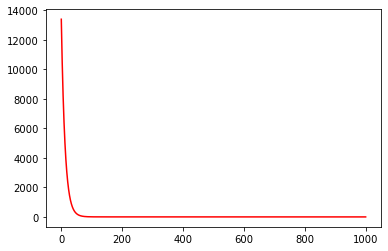

In [38]:
iters = np.arange(1000)
plt.plot(iters, cost_steps, c='r');

#### Use R2 score to evaluate LR equation output

In [39]:
score_double = r2_score(y, final_vals_double)
print('score_double :', score_double)

score_double : 0.9886850607889688


# Bonus
## LR Using sklearn

### Single Variable

#### Build a LR model usin linearmodel.LinearRegression() from sklearn library

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
model_single = LinearRegression()

#### Train the model (fit the model to the training data)

In [42]:
X1 = data_single[:,0].reshape(-1,1)
y1 = data_single[:,1].reshape(-1,1)

In [43]:
model_single.fit(X1, y1)

LinearRegression()

#### Predict y values using the trained model

In [44]:
results_sklearn = model_single.predict(X1)
results_sklearn

array([[3.44824549],
       [6.08745623],
       [4.83730388],
       [6.92089146],
       [8.240497  ],
       [6.22636227],
       [5.67073878],
       [5.74019163],
       [5.60128593],
       [4.97620959],
       [4.69839784],
       [4.49003928],
       [5.46238022]])

#### Plot model output (fitted line) with the original data (scatter plot of X,y)

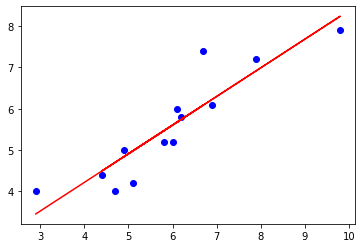

In [45]:
plt.scatter(X1, y1, c='b')
plt.plot(X1, results_sklearn, c='r');

#### Use R2 score to evaluate model output

In [46]:
r2_score(y1, results_sklearn)

0.8213156778363777

### Repeat for Mulivariate

In [47]:
cols = data_double.shape[1]
X2 = data_double[:,      :cols-1]
y2 = data_double[:,cols-1:      ]

In [48]:
model_double = LinearRegression()

In [49]:
model_double.fit(X2, y2)

LinearRegression()

In [50]:
double_sklearn = model_double.predict(X2)
double_sklearn

array([[152.60720439],
       [185.08011472],
       [181.78158547],
       [199.74522647],
       [139.1747207 ],
       [103.69391793],
       [150.2632274 ],
       [112.82069728],
       [174.55948394],
       [164.49442094],
       [143.42337551],
       [142.23416416],
       [186.54285759],
       [152.40794527],
       [151.24409108],
       [189.12496613],
       [143.50219218],
       [181.89389361],
       [177.29838914],
       [158.34934019],
       [176.57742415],
       [174.66365778],
       [167.68889392],
       [150.63279846],
       [191.1954116 ]])

In [51]:
r2_score(y2, double_sklearn)

0.9896615789448399